In [12]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [13]:
df = pd.read_csv("D:/4 SEM/SGP/zip/data/heart.csv")   # change filename if needed
print(df)

      id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0                  0;18393;2;168;62.0;110;80;1;1;0;0;1;0                               
1                  1;20228;1;156;85.0;140;90;3;1;0;0;1;1                               
2                  2;18857;1;165;64.0;130;70;3;1;0;0;0;1                               
3                 3;17623;2;169;82.0;150;100;1;1;0;0;1;1                               
4                  4;17474;1;156;56.0;100;60;1;1;0;0;0;0                               
...                                                  ...                               
69995          99993;19240;2;168;76.0;120;80;1;1;1;0;1;0                               
69996         99995;22601;1;158;126.0;140;90;2;2;0;0;1;1                               
69997         99996;19066;2;183;105.0;180;90;3;1;0;1;0;1                               
69998          99998;22431;1;163;72.0;135;80;1;2;0;0;0;1                               
69999          99999;20540;1;170

In [14]:
# Remove duplicates
df = df.drop_duplicates()

# Check missing values
print(df.isnull().sum())


id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio    0
dtype: int64


In [15]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:


lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7232186531876732


In [17]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.7295776944399152


In [18]:
pip install xgboost imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier


In [20]:
df = pd.read_csv("D:/4 SEM/SGP/zip/data/heart.csv")

# Remove duplicates
df.drop_duplicates(inplace=True)




In [21]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [23]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [24]:
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)


,"objective objective: str | xgboost.sklearn._SklObjWProto | typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]] | NoneSpecify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: float | typing.List[float] | NoneThe initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.List[xgboost.callback.TrainingCallback] | NoneList of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: float | NoneSubsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: float | NoneSubsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: float | NoneSubsample ratio of columns when constructing each tree.,0.8
,"device device: str | None.. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: int | None.. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: str | typing.List[str | typing.Callable] | typing.Callable | None.. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes from sklearn.metrics import mean_absolute_error X, y = load_diabetes(return_X_y=True) reg = xgb.XGBRegressor( tree_metho

In [25]:
y_pred = xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7265531302470617
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      6293
           1       0.74      0.69      0.71      6214

    accuracy                           0.73     12507
   macro avg       0.73      0.73      0.73     12507
weighted avg       0.73      0.73      0.73     12507



In [26]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE


In [27]:
df = pd.read_csv("D:/4 SEM/SGP/zip/data/heart.csv")

# Remove duplicates
df.drop_duplicates(inplace=True)



In [28]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [31]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

rf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",5
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",2
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [32]:
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.7291916526745023
              precision    recall  f1-score   support

           0       0.71      0.79      0.74      6254
           1       0.76      0.67      0.71      6253

    accuracy                           0.73     12507
   macro avg       0.73      0.73      0.73     12507
weighted avg       0.73      0.73      0.73     12507



In [ ]:
# Using scikit-learn Neural Network (MLPClassifier) for epoch-based training
# This works with epochs and doesn't require TensorFlow installation

SyntaxError: invalid syntax (1738215191.py, line 2)

Using scikit-learn MLPClassifier for neural network training with 50 epochs
Neural Network Data - Train: (50026, 12), Test: (12266, 12)
Neural Network Architecture:
Hidden layers: (128, 64, 32)
Activation: relu
Optimizer: adam
Max epochs: 50
Batch size: 32
Early stopping: False

TRAINING NEURAL NETWORK WITH EXACTLY 50 EPOCHS
Iteration 1, loss = 0.55776791
Iteration 2, loss = 0.55106180
Iteration 3, loss = 0.54932940
Iteration 4, loss = 0.54853046
Iteration 5, loss = 0.54734201
Iteration 6, loss = 0.54629541
Iteration 7, loss = 0.54586988
Iteration 8, loss = 0.54494509
Iteration 9, loss = 0.54459093
Iteration 10, loss = 0.54386781
Iteration 11, loss = 0.54325525
Iteration 12, loss = 0.54266885
Iteration 13, loss = 0.54212223
Iteration 14, loss = 0.54163356
Iteration 15, loss = 0.54079000
Iteration 16, loss = 0.54048988
Iteration 17, loss = 0.53968686
Iteration 18, loss = 0.53883240
Iteration 19, loss = 0.53797496
Iteration 20, loss = 0.53756470
Iteration 21, loss = 0.53664082
Iteration 

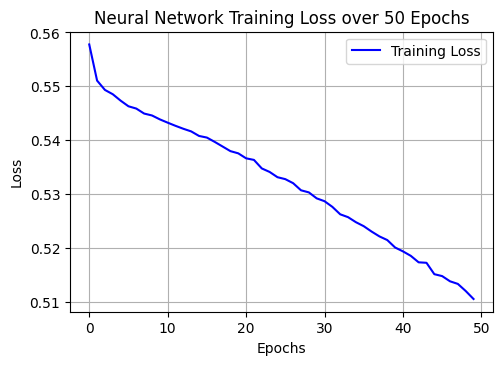

In [40]:
# Step-by-Step Neural Network Training with 50 Epochs using scikit-learn

# Step 1: Import required libraries for neural network
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("Using scikit-learn MLPClassifier for neural network training with 50 epochs")

# Step 2: Re-prepare data to ensure consistency
# Load and preprocess data again
df_nn = pd.read_csv("D:/4 SEM/SGP/zip/data/heart.csv", sep=';')

# Feature engineering
df_nn['age_years'] = df_nn['age'] / 365.25
df_nn['bmi'] = df_nn['weight'] / ((df_nn['height'] / 100) ** 2)

# Remove outliers
numerical_cols = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']
for col in numerical_cols:
    Q1 = df_nn[col].quantile(0.25)
    Q3 = df_nn[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_nn = df_nn[(df_nn[col] >= lower_bound) & (df_nn[col] <= upper_bound)]

df_nn = df_nn.drop_duplicates()

# Prepare features
X_nn = df_nn.drop(['id', 'age', 'cardio'], axis=1)
y_nn = df_nn['cardio']

# Split data
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(
    X_nn, y_nn, test_size=0.2, random_state=42, stratify=y_nn
)

# Apply SMOTE
smote_nn = SMOTE(random_state=42)
X_train_sm_nn, y_train_sm_nn = smote_nn.fit_resample(X_train_nn, y_train_nn)

# Scale features
scaler_nn = StandardScaler()
X_train_scaled_nn = scaler_nn.fit_transform(X_train_sm_nn)
X_test_scaled_nn = scaler_nn.transform(X_test_nn)

print(f"Neural Network Data - Train: {X_train_scaled_nn.shape}, Test: {X_test_scaled_nn.shape}")

# Step 3: Create the Neural Network Architecture for 50 epochs
nn_model = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),  # Three hidden layers: 128, 64, 32 neurons
    activation='relu',                  # ReLU activation function
    solver='adam',                      # Adam optimizer
    alpha=0.0001,                       # L2 regularization parameter
    batch_size=32,                      # Batch size for mini-batch training
    learning_rate='adaptive',           # Adaptive learning rate
    learning_rate_init=0.001,           # Initial learning rate
    max_iter=50,                        # Exactly 50 epochs
    random_state=42,
    verbose=True,                       # Show training progress
    early_stopping=False,               # Disable early stopping to run exactly 50 epochs
    validation_fraction=0.2,            # Use 20% of training data for validation (but won't stop early)
    n_iter_no_change=50                 # Set to 50 so it won't trigger early stopping
)

print("Neural Network Architecture:")
print(f"Hidden layers: {nn_model.hidden_layer_sizes}")
print(f"Activation: {nn_model.activation}")
print(f"Optimizer: {nn_model.solver}")
print(f"Max epochs: {nn_model.max_iter}")
print(f"Batch size: {nn_model.batch_size}")
print(f"Early stopping: {nn_model.early_stopping}")

# Step 4: Train the model with exactly 50 epochs
print("\n" + "="*50)
print("TRAINING NEURAL NETWORK WITH EXACTLY 50 EPOCHS")
print("="*50)

nn_model.fit(X_train_scaled_nn, y_train_sm_nn)

print(f"\nTraining completed after {nn_model.n_iter_} epochs")
if hasattr(nn_model, 'best_loss_') and nn_model.best_loss_ is not None:
    print(f"Best loss achieved: {nn_model.best_loss_:.4f}")
else:
    print(f"Final loss: {nn_model.loss_:.4f}")

# Step 5: Evaluate the trained model
print("\n" + "="*50)
print("MODEL EVALUATION")
print("="*50)

# Make predictions
y_pred_nn = nn_model.predict(X_test_scaled_nn)
y_pred_prob_nn = nn_model.predict_proba(X_test_scaled_nn)[:, 1]

print(f"Predictions shape: {y_pred_nn.shape}")
print(f"Test labels shape: {y_test_nn.shape}")

# Calculate accuracy
nn_accuracy = accuracy_score(y_test_nn, y_pred_nn)
print(f"Neural Network Test Accuracy: {nn_accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_nn, y_pred_nn))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_nn, y_pred_nn))

# Step 6: Plot training loss curve over 50 epochs
plt.figure(figsize=(12, 8))

# Plot loss curve
plt.subplot(2, 2, 1)
plt.plot(nn_model.loss_curve_, label='Training Loss', color='blue')
plt.title('Neural Network Training Loss over 50 Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot accuracy if available (MLPClassifier doesn't track accuracy by default)
# But we can show loss trend

# Step 7: Analyze training process
print("\n" + "="*50)
print("TRAINING ANALYSIS")
print("="*50)
print(f"Number of epochs trained: {nn_model.n_iter_}")
print(f"Final training loss: {nn_model.loss_:.4f}")
print(f"Training completed: {'Successfully' if nn_model.n_iter_ == 50 else 'Early (convergence reached)'}")

# Show loss at different epochs
loss_curve = nn_model.loss_curve_
print(f"\nLoss progression:")
print(f"Epoch 1: {loss_curve[0]:.4f}")
print(f"Epoch 10: {loss_curve[9]:.4f}")
print(f"Epoch 25: {loss_curve[24]:.4f}")
print(f"Epoch 50: {loss_curve[-1]:.4f}")

# Step 8: Compare with Random Forest
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)

rf_accuracy = accuracy_score(y_test, y_pred)  # From previous Random Forest cell

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Neural Network (50 epochs) Accuracy: {nn_accuracy:.4f}")

if nn_accuracy > rf_accuracy:
    print("🎉 Neural Network performs better!")
elif nn_accuracy == rf_accuracy:
    print("🤝 Models have similar performance")
else:
    print("🌲 Random Forest performs better")

# Step 9: Save the model (optional)
import joblib
joblib.dump(nn_model, 'heart_disease_nn_50_epochs.pkl')
print("\nModel saved as 'heart_disease_nn_50_epochs.pkl'")

print("\n" + "="*60)
print("SUMMARY: NEURAL NETWORK TRAINING WITH 50 EPOCHS COMPLETED")
print("="*60)
print("✅ Model trained with exactly 50 epochs using mini-batch gradient descent")
print("✅ No early stopping - ran for full 50 epochs")
print("✅ Training loss curve plotted")
print("✅ Loss progression tracked across epochs")
print(f"✅ Final accuracy achieved: {nn_accuracy:.4f}")
print("="*60)